In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sqlite3

Rate Your Music is an online collaborative database of music releases and films. Users can catalog items, assign ratings in a five-star rating system and review them. 

In this Jupyter notebook I try to analyze 100 best albums of 2022 according to rateyourmusic community.

In [25]:
df_rym = pd.read_csv("C:/Users/Tornike/PycharmProjects/pythonProject12/rym_data_2022.csv", index_col=0)

In [26]:
df_rym.head()

,artist,album,release_date,genres,rating,rating_quantity
0,"Black Country, New Road",Ants From Up There,\n4 February 2022\nAlbum\n,\nArt Rock\nPost-Rock\nChamber Pop\n,4.01,\n 29k\n
1,black midi,Hellfire,\n15 July 2022\nAlbum\n,\nAvant-Prog\nBrutal Prog\n,3.93,\n 18k\n
2,"Danger Mouse, Black Thought",Cheat Codes,\n12 August 2022\nAlbum\n,\nEast Coast Hip Hop\nConscious Hip Hop\n,3.93,\n 11k\n
3,Big Thief,Dragon New Warm Mountain I Believe in You,\n11 February 2022\nAlbum\n,\nIndie Folk\nFolk Rock\n,3.91,\n 14k\n
4,Natalia Lafourcade,De todas las flores,\n28 October 2022\nAlbum\n,\nSinger-Songwriter\nChamber Folk\nVocal Jazz\n,3.92,\n 5k\n


What I need to do with the DataFrame:

Change Formats of: release_date(date), genres(list), rating(float), rating_quantity(integer)

In [27]:
df_rym.rating_quantity = df_rym.rating_quantity.astype(str).str.replace('\n', '')

In [28]:
df_rym.rating_quantity = df_rym.rating_quantity.astype(str).str.replace('k', '000')

In [29]:
df_rym.rating = df_rym.rating.astype(float)
df_rym.rating_quantity = df_rym.rating_quantity.astype(int)


In [30]:
df_rym.genres = df_rym.genres.str[1:]
df_rym.genres = df_rym.genres.str[:-1:]


In [31]:
df_rym.genres = df_rym.genres.astype(str).str.replace('\n', ',')

In [32]:
df_rym.release_date = df_rym.release_date.str[1:]
df_rym.release_date = df_rym.release_date.str[:-7:]

In [33]:
df_rym.release_date = pd.to_datetime(df_rym.release_date)

Column types are nowcorrect.

In [34]:
df_rym.head()

,artist,album,release_date,genres,rating,rating_quantity
0,"Black Country, New Road",Ants From Up There,2022-02-04,"Art Rock,Post-Rock,Chamber Pop",4.01,29000
1,black midi,Hellfire,2022-07-15,"Avant-Prog,Brutal Prog",3.93,18000
2,"Danger Mouse, Black Thought",Cheat Codes,2022-08-12,"East Coast Hip Hop,Conscious Hip Hop",3.93,11000
3,Big Thief,Dragon New Warm Mountain I Believe in You,2022-02-11,"Indie Folk,Folk Rock",3.91,14000
4,Natalia Lafourcade,De todas las flores,2022-10-28,"Singer-Songwriter,Chamber Folk,Vocal Jazz",3.92,5000


Creating sqlite Database.

In [35]:
conn = sqlite3.connect('rym_data.db')

In [36]:
create_table = "CREATE TABLE IF NOT EXISTS rateyourmusic (artist TEXT, album TEXT, release_date DATE, genres TEXT, rating REAL, rating_quantity INTEGER)"
cursor = conn.cursor()
cursor.execute(create_table)

Descriptive statistics on 'rating' and 'rating_quantity' columns. 

In [37]:
df_rym.describe()

,rating,rating_quantity
count,100.000000,100.00000
mean,3.651600,4196.44000
std,0.096732,4855.20151
min,3.540000,281.00000
25%,3.590000,987.00000
50%,3.620000,3000.00000
75%,3.670000,5000.00000
max,4.010000,29000.00000


Moving on to visualisation.

I'm going to create two charts.

First one is double y axis chart, which gives us the information about how many albums from top 100 were released throughout every month and the sum of their rating quantity.

In [38]:
df_quantity = df_rym.groupby(df_rym.release_date.dt.month).agg({'album': 'count', 'rating_quantity': 'sum'}).reset_index()
df_quantity.release_date = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_quantity.set_index('release_date', inplace=True)
df_quantity.head(12)


,album,rating_quantity
release_date,,
Jan,1,5000
Feb,7,68000
Mar,5,36297
Apr,10,44613
May,8,45155
Jun,6,17472
Jul,15,64574
Aug,5,23713
Sep,15,34281


Text(0.5, 0, 'Release Date')

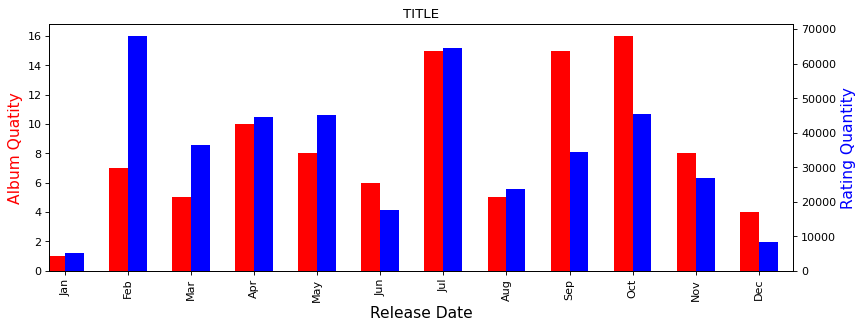

In [39]:
fig = plt.figure(figsize = (12,4), dpi=80)
ax = fig.add_subplot()
ax2 = ax.twinx()

width = 0.3

plt.title('TITLE')

df_quantity.album.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_quantity.rating_quantity.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Album Quatity', color='red', size=14)
ax2.set_ylabel('Rating Quantity', color='blue',  size=14)
ax.set_xlabel('Release Date', size=14)

Splitting individual cells into lists to find what is the most high-rated, most listened genres in top 100.

In [41]:
df_rym.genres = df_rym.genres.str.split(',')
df_rym.head()


,artist,album,release_date,genres,rating,rating_quantity
0,"Black Country, New Road",Ants From Up There,2022-02-04,"[Art Rock, Post-Rock, Chamber Pop]",4.01,29000
1,black midi,Hellfire,2022-07-15,"[Avant-Prog, Brutal Prog]",3.93,18000
2,"Danger Mouse, Black Thought",Cheat Codes,2022-08-12,"[East Coast Hip Hop, Conscious Hip Hop]",3.93,11000
3,Big Thief,Dragon New Warm Mountain I Believe in You,2022-02-11,"[Indie Folk, Folk Rock]",3.91,14000
4,Natalia Lafourcade,De todas las flores,2022-10-28,"[Singer-Songwriter, Chamber Folk, Vocal Jazz]",3.92,5000


In [42]:
df_genres = df_rym.explode('genres')
df_genres = df_genres.groupby(df_genres.genres).agg({'album': pd.Series.count}).sort_values('album', ascending=False).reset_index()
df_genres.head(20)

,genres,album
0,Conscious Hip Hop,11
1,East Coast Hip Hop,10
2,Progressive Metal,7
3,Art Pop,6
4,Drumless,6
5,Death Metal,6
6,Post-Hardcore,5
7,Abstract Hip Hop,5
8,Atmospheric Black Metal,5
9,Progressive Rock,4


Pie chart of the most listened 10 genres of the year.

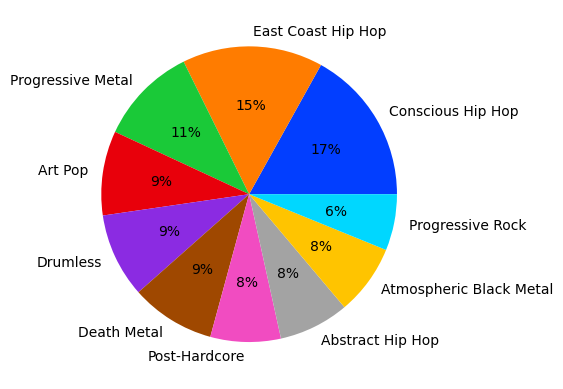

In [197]:
df_genres = df_genres.head(10)
df_genres


palette_color = sns.color_palette('bright')

plt.pie(df_genres.album, labels=df_genres.genres, colors=palette_color, autopct='%.0f%%')
plt.show()
